# TECH2 Mandatory assignment 2

## About the mandatory assignment

-   The assignment must be completed individually.
-   You are allowed to use all online resources for help, including generative AI. You must include a statement on how you used AI to solve the tasks.
-   After the assignment deadline, you must perform a peer review of two other students' assignment on Canvas. You're not allowed to use AI to write the peer-review for you.
-   Deadline for the assignment: Friday, October 17, 16:00.
-   Deadline for the peer review: Friday, October 24, 16:00.


## Requirements

-   Your solution needs to be uploaded to GitHub. You should fork the assignment repository at
    [https://github.com/richardfoltyn/TECH2-H25-assignment2](https://github.com/richardfoltyn/TECH2-H25-assignment2)
    and add your solution to this notebook.
-   All commits in your repository must be *prior* to the deadline. 
-   You need to make sure that your GitHub repository is publicly accessible. This can be changed in the GitHub repository setttings, if required.
-   You need to submit the URL to the your GitHub repository on Canvas.
-   Make sure your notebook runs without errors (`Restart` and `Run all`). 
-   Your notebook *must* run with the TECH2 environment we've been using in part 2. You can create this environment from the 
    `environment.yml` file in this repository if you haven't done so earlier.


## Tasks

In this assignment, you are asked to analyze a 10% sub-sample of the Survey of Consumer Finances (SCF), a survey of household portfolios that is representative of the US population. The survey was administered every 3 years from 1989 to 2022. The appendix in this document contains a description of the variables present in this data set (this is a subset; the original SCF contains many more variables).

1.  Data preprocessing

    1.  Read the CSV file `SCF_10pct.csv` stored in this repository.
    2.  Keep only observations where the household head is aged between 25 and 89. 
    3.  Create the column `'college'`, which contains an indicator variable that is 1 when the household head has at least some college (column `'educ'` is 3 or 4), and 0 otherwise.
    4.  Divide the values in the column `'networth'` by 1,000 so that they are reported in thousands of US dollars.
    5.  Report the number of observations in the final sample.

2.  In this part, you're asked to analyze how net worth (total gross assets minus total debt) varies across the four education levels (no high school, high school, some college, 4-year college or more):

    1.  Compute the average net worth (in thousands of US dollars) by education (use a loop).
    2.  Create a bar chart that plots the average net worth by education.

3.  In this part, you're asked to analyze how net worth has changed over the last 3 decades:

    1.  Compute the average net worth (in thousands of US dollars) by survey year (use a loop).
    2.  Create a line plot that shows the evolution of average net worth over the years 1989 to 2022.

4.  Finally, combine the analyses from the previous parts to see how net worth evolved over the years for those with and without college.

    1.  Compute the average net worth (in thousands of US dollars) by survey year, separately for non-college (`college=0`) and the college-educated (`college=1`).
    2.  Create a line plot that shows the evolution of net worth over the years 1989 to 2022 by college status, i.e., your figure should contain two lines, one for college and one for non-college.

Remember to add axis labels, titles, and legends (where applicable) to all your figures.


## Hints

-   The assignment can be solved using the concepts we covered up to and including lecture/workshop 3 on Friday, October 10. 
-   In particular, you don't need `groupby()` which we'll cover later in the course, but you can instead loop over education levels or years, as needed.

***
**WRITE YOUR SOLUTION TO PARTS 1-4 HERE**

In [76]:
import pandas as pd
import numpy as np

#part 1

# A. Read the CSV file
file = 'C:/Users/andre/OneDrive/NHH/TECH2/TECH2-H25/TECH2-H25-assignment2/SCF_10pct.csv'
df = pd.read_csv(file)

# B. Keep only household heads aged between 25 and 89
df = df[df['age'].between(25, 89)]

# C. Create indicator variable 'college'
df['college'] = np.where(df['educ'].isin([3, 4]), 1, 0)

# D. Divide 'networth' by 1000
df['networth'] = df['networth'] / 1000

# E. Report number of observations in the final sample
print("Number of observations in final sample:", len(df))

# Display first few rows
df.head()





Number of observations in final sample: 5471


,id,year,age,educ,networth,college
0,1,1989,35,2,0.0000,0
1,2,1989,35,2,0.0000,0
2,3,1989,51,2,16.8999,0
3,4,1989,33,2,25.8456,0
4,5,1989,33,2,25.8456,0


Education level 1 has an average networth of 149 thousand USD
Education level 2 has an average networth of 264 thousand USD
Education level 3 has an average networth of 1035 thousand USD
Education level 4 has an average networth of 1643 thousand USD
[np.float64(149.66408548585486), np.float64(264.103558540724), np.float64(1035.2312007857142), np.float64(1643.8509543513958)]


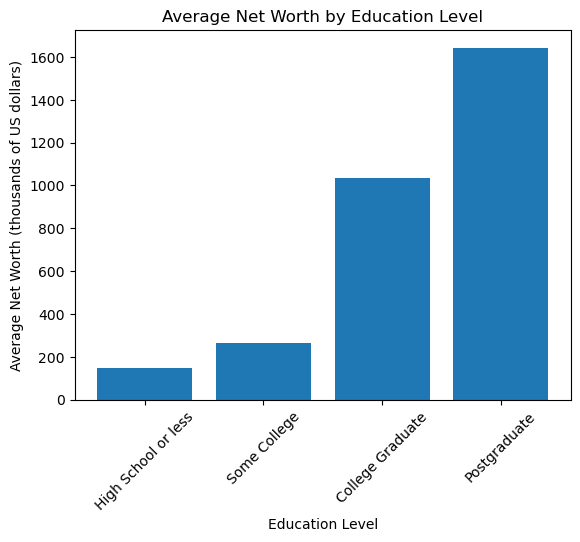

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#part 2

file = 'C:/Users/andre/OneDrive/NHH/TECH2/TECH2-H25/TECH2-H25-assignment2/SCF_10pct.csv'
df = pd.read_csv(file)

# A. Compute the average net worth (in thousands of US dollars) by education (use a loop).
lst = []
educ_labels = ['High School or less', 'Some College', 'College Graduate', 'Postgraduate']
educ_num = 1
while educ_num < 5:     
    filtered_educ = df[df['educ'] == educ_num]
    avg_networth = filtered_educ['networth'].mean() / 1000
    print("Education level", educ_num, "has an average networth of", int(avg_networth), "thousand USD")
    lst.append(avg_networth)
    educ_num += 1
print(lst)

# B. Create a bar chart that plots the average net worth by education.

plt.figure()
plt.bar(educ_labels, lst)
plt.title("Average Net Worth by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Net Worth (thousands of US dollars)")
plt.xticks(rotation=45)
plt.show()








Survey year 1989 has an average networth of 819.1199113636363 thousand USD
Survey year 1992 has an average networth of 364.4913380165289 thousand USD
Survey year 1995 has an average networth of 463.59103429752065 thousand USD
Survey year 1998 has an average networth of 871.127063016529 thousand USD
Survey year 2001 has an average networth of 485.0574045454545 thousand USD
Survey year 2004 has an average networth of 683.8299469008263 thousand USD
Survey year 2007 has an average networth of 1351.5853638429755 thousand USD
Survey year 2010 has an average networth of 572.3187574380166 thousand USD
Survey year 2013 has an average networth of 868.0521623966943 thousand USD
Survey year 2016 has an average networth of 851.6947035123967 thousand USD
Survey year 2019 has an average networth of 703.3422975206612 thousand USD
Survey year 2022 has an average networth of 2381.5986280991738 thousand USD
[np.float64(819.1199113636363), np.float64(364.4913380165289), np.float64(463.59103429752065), np.

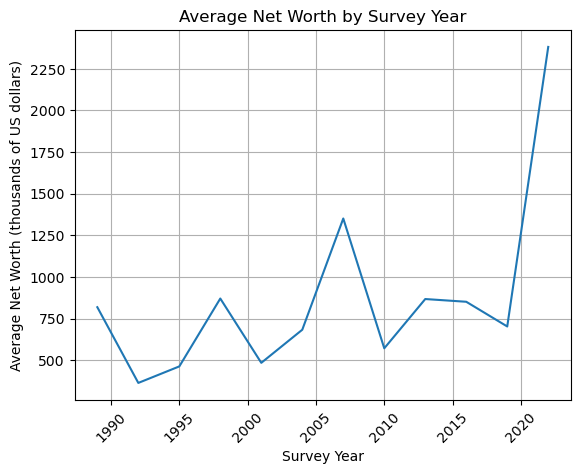

In [78]:
#Part 3
# A. Compute the average net worth (in thousands of US dollars) by survey year (use a loop).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = 'C:/Users/andre/OneDrive/NHH/TECH2/TECH2-H25/TECH2-H25-assignment2/SCF_10pct.csv'
df = pd.read_csv(file)

# A. Compute the average net worth (in thousands of US dollars) by education (use a loop).
lst = []
year_num_lst = []
year_num = 1989 #1989 is the first year in the dataset
while year_num < 2023:  #2022 is the last year in the dataset
    filtered_year = df[df['year'] == year_num]
    avg_networth = filtered_year['networth'].mean() / 1000
    if avg_networth == avg_networth:  # Check for NaN
        print("Survey year", year_num, "has an average networth of", (avg_networth), "thousand USD")
        lst.append(avg_networth)
        year_num_lst.append(year_num)
    year_num += 1
print(lst)

# B. Create a line plot that shows the evolution of average net worth over the years 1989 to 2022.
plt.plot(year_num_lst, lst)
plt.title("Average Net Worth by Survey Year")
plt.xlabel("Survey Year")
plt.ylabel("Average Net Worth (thousands of US dollars)")
plt.xticks(rotation=45)
plt.grid()
plt.show()



Survey year 1989 has an average networth of 187.456340433213 thousand USD
Survey year 1992 has an average networth of 192.78495951417005 thousand USD
Survey year 1995 has an average networth of 232.97130127659574 thousand USD
Survey year 1998 has an average networth of 264.97327085201795 thousand USD
Survey year 2001 has an average networth of 179.98564739130438 thousand USD
Survey year 2004 has an average networth of 316.6808615763547 thousand USD
Survey year 2007 has an average networth of 352.83686271186446 thousand USD
Survey year 2010 has an average networth of 199.15223024390244 thousand USD
Survey year 2013 has an average networth of 180.7742543269231 thousand USD
Survey year 2016 has an average networth of 230.36581337209302 thousand USD
Survey year 2019 has an average networth of 184.08605999999997 thousand USD
Survey year 2022 has an average networth of 213.580625 thousand USD
[np.float64(187.456340433213), np.float64(192.78495951417005), np.float64(232.97130127659574), np.fl

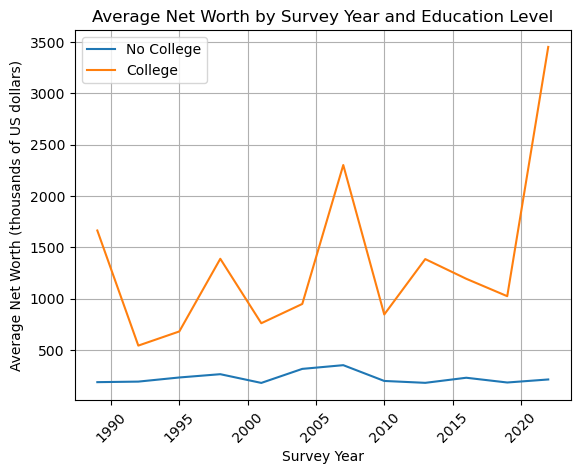

In [79]:
#Part 4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = 'C:/Users/andre/OneDrive/NHH/TECH2/TECH2-H25/TECH2-H25-assignment2/SCF_10pct.csv'
df = pd.read_csv(file)


# Create indicator variable 'college'
df['college'] = np.where(df['educ'].isin([3, 4]), 1, 0)

filtered_non_college = df[df['college'] == 0]
filtered_college = df[df['college'] == 1]

lst = []
year_num_lst = []
year_num = 1989 #1989 is the first year in the dataset
while year_num < 2023:  #2022 is the last year in the dataset
    filtered_year = filtered_non_college[filtered_non_college['year'] == year_num]
    avg_networth = filtered_year['networth'].mean() / 1000
    if avg_networth == avg_networth:  # Check for NaN
        print("Survey year", year_num, "has an average networth of", (avg_networth), "thousand USD")
        lst.append(avg_networth)
        year_num_lst.append(year_num)
    year_num += 1
print(lst)

lst_2 = []
year_num_lst_2 = []
year_num_2 = 1989 #1989 is the first year in the dataset
while year_num_2 < 2023:  #2022 is the last year in the dataset
    filtered_year = filtered_college[filtered_college['year'] == year_num_2]
    avg_networth = filtered_year['networth'].mean() / 1000
    if avg_networth == avg_networth:  # Check for NaN
        print("Survey year", year_num_2, "has an average networth of", (avg_networth), "thousand USD")
        lst_2.append(avg_networth)
        year_num_lst_2.append(year_num_2)
    year_num_2 += 1
print(lst_2)

plt.plot((year_num_lst), (lst))
plt.plot((year_num_lst_2), (lst_2))
plt.legend(['No College', 'College'])   
plt.title("Average Net Worth by Survey Year and Education Level")
plt.xlabel("Survey Year")
plt.ylabel("Average Net Worth (thousands of US dollars)")
plt.xticks(rotation=45)
plt.grid()
plt.show()



***
# Data description

## Variables

| Variable         | Description |
|------------------|-------------|
| id               | Identifier  |
| year             | Survey year |
| age             | Age of reference person (household head) |
| educ            | Education of reference person (1 = no high school/GED, 2 = high school or GED, 3 = some college or Assoc. degree, 4 = Bachelors degree or higher)|
| networth        | Net worth in US dollars |

## Reference

- URL: https://www.federalreserve.gov/econres/scfindex.htm
- DOI Identifier: https://doi.org/10.17016/8799
- Creator: Board of Governors of the Federal Reserve Board
- Name: 2022 Survey of Consumer Finances
- Description:
    The Survey of Consumer Finances (SCF) is normally a triennial cross-sectional survey of U.S. families. The survey data include information on families' balance sheets, pensions, income, and demographic characteristics.
- Publisher: Board of Governors of the Federal Reserve System
- Publication Year: 2023 